## HR Analytics

**An Introduction**

**Definition** - HR analytics is the process of collecting and analyzing Human Resource (HR) data in order to improve an organization’s workforce performance. The process can also be referred to as talent analytics, people analytics, or even workforce analytics. This method of data analysis takes data that is routinely collected by HR and correlates it to HR and organizational objectives. Doing so provides measured evidence of how HR initiatives are contributing to the organization’s goals and strategies.

**Need of HR Analytics** - Most organizations already have data that is routinely collected, so why the need for a specialized form of analytics? Can HR not simply look at the data they already have? Unfortunately, raw data on its own cannot actually provide any useful insight. It would be like looking at a large spreadsheet full of numbers and words. Once organized, compared and analyzed, this raw data provides useful insight.They can help answer questions like:

- What patterns can be revealed in employee turnover?
- How long does it take to hire employees?
- What amount of investment is needed to get employees up to a fully productive speed?
- Which of our employees are most likely to leave within the year?
- Are learning and development initiatives having an impact on employee performance?

**The process of HR Analytics**

HR Analytics is made up of several components that feed into each other.

- To gain the problem-solving insights that HR Analytics promises, data must first be collected.
- The data then needs to be monitored and measured against other data, such as historical information, norms or averages.
- This helps identify trends or patterns. It is at this point that the results can be analyzed at the analytical stage.
- The final step is to apply insight to organizational decisions.

### Importing the Necessary Libraries

In [1]:
!pip install missingno

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

### Importing the Dataset and Checking it

In [3]:
data = pd.read_csv(r'C:\Users\lenovo\Desktop\archive\WA_Fn-UseC_-HR-Employee-Attrition.csv')

data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

## a) Exploratory Data Analysis ( EDA )

**1) Checking Number of Rows and Column**

In [4]:
data.shape

(1470, 35)

Their are 1470 Rows and 35 Columns in our Dataset

**2) Summary Statistics of Data**

In [5]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

**Observations From Above Summary Statistics**:

- The average age of employees at IBM is 39, which means while hiring, they prefer candidates with decent work experience and expect higher level of expertise.
- The average salary hike for employees is 15% with maximum being 25%. With decent salary hike in the organisation, employees tend to stay longer at the company and tend to enjoy long-term benefits with job security. This means, IBM rewards it's employees for their performance. This is proporational to employee satisfaction.
- However , the average Employee satisfaction stands at 2.7 out of 5.
- Most of the employees who get into IBM have worked with 2 or 3 companies in the past.
- On an average, an employee has worked at IBM for around 11 years and there seems to be an outlier - wherein an employee has worked for 38 years.
- It takes around 2 years for an IBM employee to bag his/her next promotion at the workplace.

**3) Checking for Missing Values**

<AxesSubplot:>

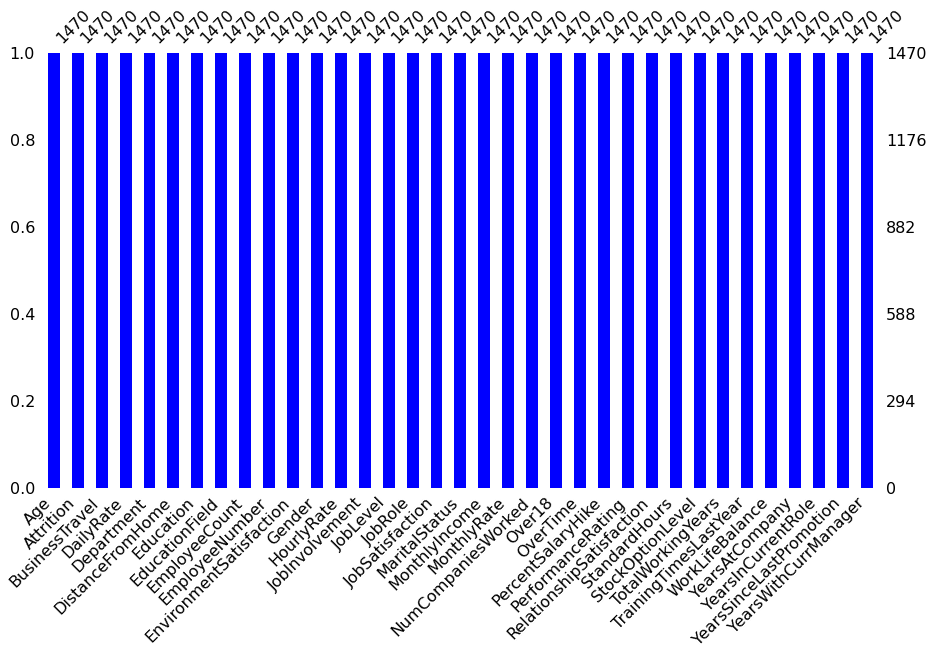

In [6]:
msno.bar(data, color = 'b', figsize = (15,8))

**From above graph, we can see that there are no missing values in our dataset.**

### 4) Converting Categorical Variables to Binary

In [7]:
data['Attrition'] = data['Attrition'].map({'Yes':1, 'No':0})
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [8]:
data.Education.replace({1: 'High School',
                       2:'Undergrad',
                       3:'Graduate',
                       4:'Post Graduate',
                       5:'Doctorate'},inplace=True)
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeCount  \
0                 1      Undergrad  Life Sciences              1   
1                 8    High School  Life Sciences              1   
2                 2      Undergrad          Other              1   
3                 3  Post Graduate  Life Sciences              1   
4                 2    High School        Medical              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0               1  ...                         1            80   
1               2  ...                         4            80   
2               4  ...                         2            80   
3               5  ...                         3            80   
4               7  ...                         4            80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                  8                      0               1   
1                 1                 10                      3               3   
2                 0                  7                      3               3   
3                 0                  8                      3               3   
4                 1                  6                      3               3   

   YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0               6                  4                        0   
1              10                  7                        1   
2               0                  0                        0   
3               8                  7                        3   
4               2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [9]:
cols = ["JobInvolvement", "JobSatisfaction", "PerformanceRating"]

for col in cols:
    data[col].replace({1 : "Low",
                                    2 : "Medium",
                                    3 : "High",
                                    4 : "Very High"}, inplace = True)
data.head()

Age  Attrition     BusinessTravel  DailyRate              Department  \
0   41          1      Travel_Rarely       1102                   Sales   
1   49          0  Travel_Frequently        279  Research & Development   
2   37          1      Travel_Rarely       1373  Research & Development   
3   33          0  Travel_Frequently       1392  Research & Development   
4   27          0      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeCount  \
0                 1      Undergrad  Life Sciences              1   
1                 8    High School  Life Sciences              1   
2                 2      Undergrad          Other              1   
3                 3  Post Graduate  Life Sciences              1   
4                 2    High School        Medical              1   

   EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0               1  ...                         1            80   
1               2  ...                         4            80   
2               4  ...                         2            80   
3               5  ...                         3            80   
4               7  ...                         4            80   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                 0                 8                      0               1   
1                 1                10                      3               3   
2                 0                 7                      3               3   
3                 0                 8                      3               3   
4                 1                 6                      3               3   

  YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0              6                  4                        0   
1             10                  7                        1   
2              0                  0                        0   
3              8                  7                        3   
4              2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

**5) Dropping the unwanted Columns**

In [10]:
data = data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'], axis=1)
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**6) Checking unique numbers & values from all the columns & dropping duplicate values from our dataset**

In [11]:
attFeatures = []
for i in data.columns:
    attFeatures.append([i, data[i].nunique(), data[i].drop_duplicates().values])
pd.DataFrame(attFeatures, columns = ['Features', 'Unique Number', 'Values'])

Features  Unique Number  \
0                        Age             43   
1                  Attrition              2   
2             BusinessTravel              3   
3                  DailyRate            886   
4                 Department              3   
5           DistanceFromHome             29   
6                  Education              5   
7             EducationField              6   
8    EnvironmentSatisfaction              4   
9                     Gender              2   
10                HourlyRate             71   
11            JobInvolvement              4   
12                  JobLevel              5   
13                   JobRole              9   
14           JobSatisfaction              4   
15             MaritalStatus              3   
16             MonthlyIncome           1349   
17               MonthlyRate           1427   
18        NumCompaniesWorked             10   
19                  OverTime              2   
20         PercentSalaryHike             15   
21         PerformanceRating              2   
22  RelationshipSatisfaction              4   
23          StockOptionLevel              4   
24         TotalWorkingYears             40   
25     TrainingTimesLastYear              7   
26           WorkLifeBalance              4   
27            YearsAtCompany             37   
28        YearsInCurrentRole             19   
29   YearsSinceLastPromotion             16   
30      YearsWithCurrManager             18   

                                               Values  
0   [41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2...  
1                                              [1, 0]  
2      [Travel_Rarely, Travel_Frequently, Non-Travel]  
3   [1102, 279, 1373, 1392, 591, 1005, 1324, 1358,...  
4    [Sales, Research & Development, Human Resources]  
5   [1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5...  
6   [Undergrad, High School, Post Graduate, Gradua...  
7   [Life Sciences, Other, Medical, Marketing, Tec...  
8                                        [2, 3, 4, 1]  
9                                      [Female, Male]  
10  [94, 61, 92, 56, 40, 79, 81, 67, 44, 84, 49, 3...  
11                     [High, Medium, Very High, Low]  
12                                    [2, 1, 3, 4, 5]  
13  [Sales Executive, Research Scientist, Laborato...  
14                     [Very High, Medium, High, Low]  
15                        [Single, Married, Divorced]  
16  [5993, 5130, 2090, 2909, 3468, 3068, 2670, 269...  
17  [19479, 24907, 2396, 23159, 16632, 11864, 9964...  
18                     [8, 1, 6, 9, 0, 4, 5, 2, 7, 3]  
19                                          [Yes, No]  
20  [11, 23, 15, 12, 13, 20, 22, 21, 17, 14, 16, 1...  
21                                  [High, Very High]  
22                                       [1, 4, 2, 3]  
23                                       [0, 1, 3, 2]  
24  [8, 10, 7, 6, 12, 1, 17, 5, 3, 31, 13, 0, 26, ...  
25                              [0, 3, 2, 5, 1, 4, 6]  
26                                       [1, 3, 2, 4]  
27  [6, 10, 0, 8, 2, 7, 1, 9, 5, 4, 25, 3, 12, 14,...  
28  [4, 7, 0, 2, 5, 9, 8, 3, 6, 13, 1, 15, 14, 16,...  
29  [0, 1, 3, 2, 7, 4, 8, 6, 5, 15, 9, 13, 12, 10,...  
30  [5, 7, 0, 2, 6, 8, 3, 11, 17, 1, 4, 12, 9, 10,...

## b) Data Visvalization

### 1) Attrition Rate

0    1233
1     237
Name: Attrition, dtype: int64

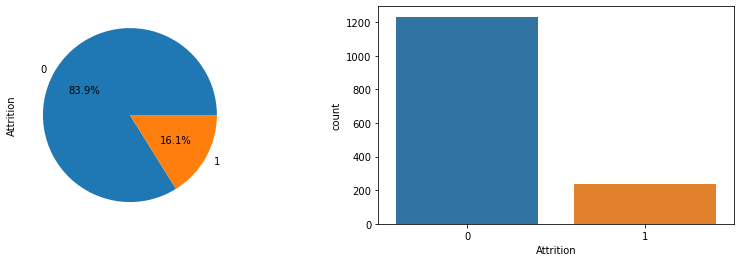

In [12]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Attrition'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Attrition'])
data['Attrition'].value_counts()

### 2) Travel Readiness

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

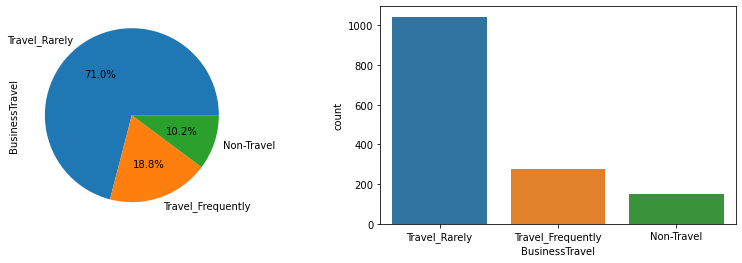

In [13]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['BusinessTravel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['BusinessTravel'])
data['BusinessTravel'].value_counts()

### 3) Count By Department

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

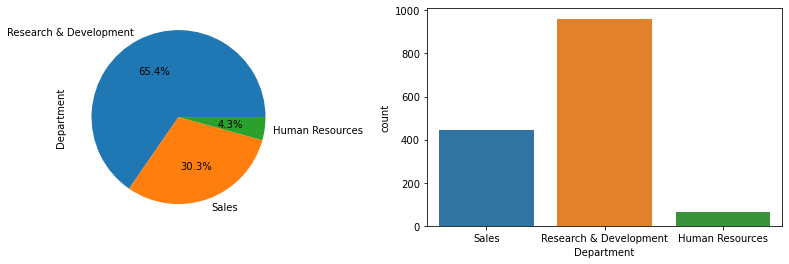

In [14]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Department'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Department'])
data['Department'].value_counts()

## Observation
- Most of the employees are from the R&D i.e. Research & Development Department

### 4) Education Level

Graduate         572
Post Graduate    398
Undergrad        282
High School      170
Doctorate         48
Name: Education, dtype: int64

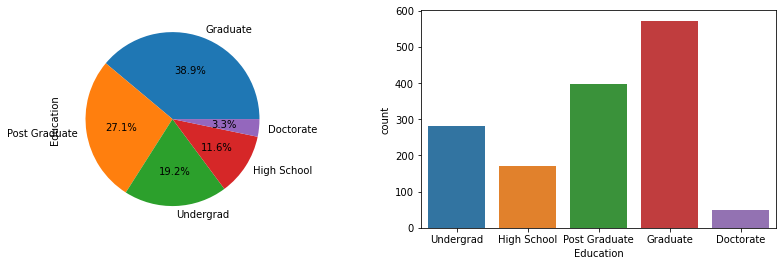

In [15]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['Education'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['Education'])
data['Education'].value_counts()

### 5) Count by Education Field

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

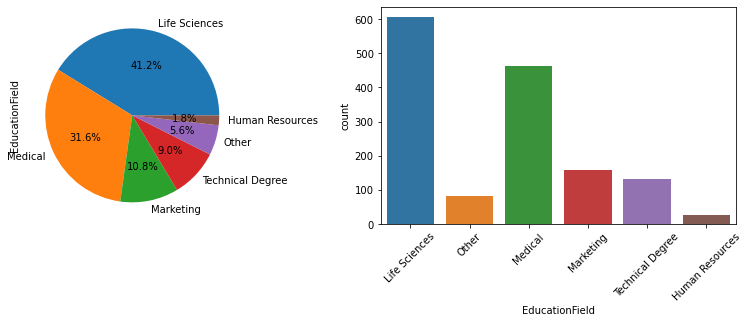

In [16]:
plt.figure(figsize=(14,4))
plt.subplot(1,2,1)
data['EducationField'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(data['EducationField'])
plt.xticks(rotation=45)
data['EducationField'].value_counts()

### 6) Count By JobRole

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

<Figure size 1008x288 with 0 Axes>

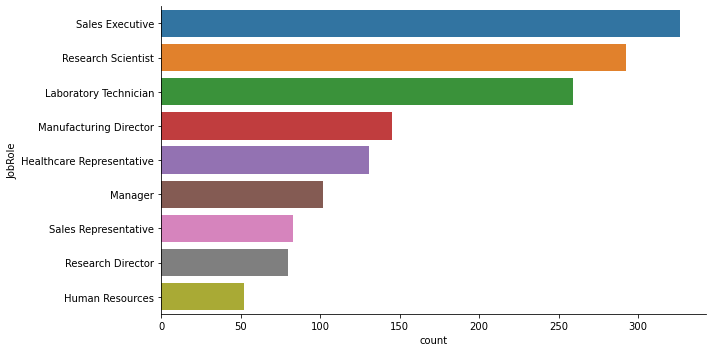

In [17]:
plt.figure(figsize=(14,4))
sns.catplot(y='JobRole', kind='count', aspect=2, data=data)
data['JobRole'].value_counts()

### 7) Correlation Matrix

**Separating Categorical and numerical data**

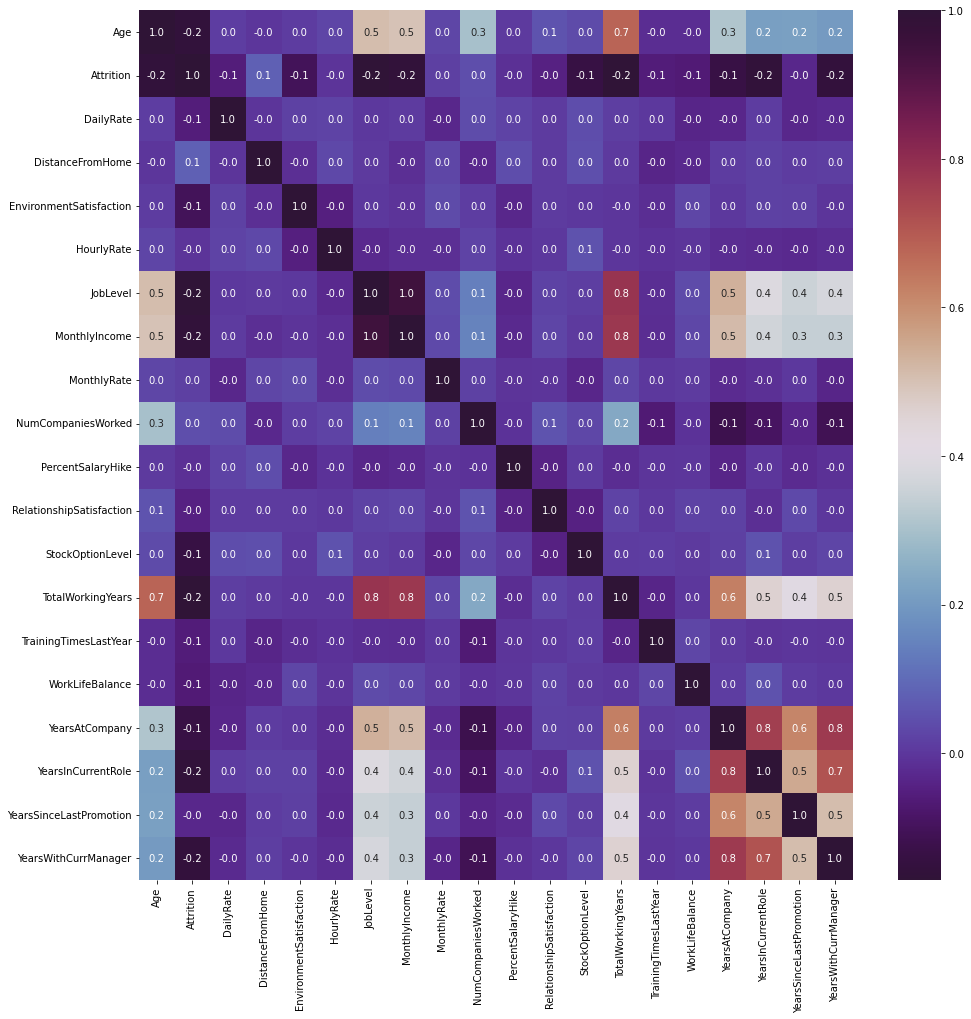

In [18]:
categorical = []
for col, value in data.iteritems():
    if value.dtype == 'object':
        categorical.append(col)


df_cat = data[categorical]

# Storing the numerical columns in a list numerical
numerical = data.columns.difference(categorical)


df_num= data[numerical]

plt.figure(figsize=(16,16))
sns.heatmap(df_num.corr(),annot=True ,cmap='twilight_shifted',fmt= '.1f')
plt.show()

**From above Correlation Matrix, We can infer that** -

- Age and Monthly Income are moderately correlated.
- Montly Income and Job Level are highly correlated with Total Working Years.
- Montly Income and Job Level are moderately correlated with Years at Company.
- Monthly Income is highly correlated with Job Level.
- Years at Company is also highly correlated with Years in Current Role.
- Age and Total Working Years are also highly corelated.

**Comaparison between the employees who stayed & who left the Organization**

In [19]:
stayed=data[data.Attrition!=1]
print('Number of employees who did not leave in the dataset:', len(stayed),
      f'or {round(len(stayed)/data.Attrition.count()*100)}% of the total')

Number of employees who did not leave in the dataset: 1233 or 84% of the total


**Statistical Summary of the Data of Employees who Stayed in the Organization**

In [20]:
stayed.describe()

Age  Attrition    DailyRate  DistanceFromHome  \
count  1233.000000     1233.0  1233.000000       1233.000000   
mean     37.561233        0.0   812.504461          8.915653   
std       8.888360        0.0   403.208379          8.012633   
min      18.000000        0.0   102.000000          1.000000   
25%      31.000000        0.0   477.000000          2.000000   
50%      36.000000        0.0   817.000000          7.000000   
75%      43.000000        0.0  1176.000000         13.000000   
max      60.000000        0.0  1499.000000         29.000000   

       EnvironmentSatisfaction   HourlyRate     JobLevel  MonthlyIncome  \
count              1233.000000  1233.000000  1233.000000    1233.000000   
mean                  2.771290    65.952149     2.145985    6832.739659   
std                   1.071132    20.380754     1.117933    4818.208001   
min                   1.000000    30.000000     1.000000    1051.000000   
25%                   2.000000    48.000000     1.000000    3211.000000   
50%                   3.000000    66.000000     2.000000    5204.000000   
75%                   4.000000    83.000000     3.000000    8834.000000   
max                   4.000000   100.000000     5.000000   19999.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count   1233.000000          1233.00000        1233.000000   
mean   14265.779400             2.64558          15.231144   
std     7102.260749             2.46009           3.639511   
min     2094.000000             0.00000          11.000000   
25%     7973.000000             1.00000          12.000000   
50%    14120.000000             2.00000          14.000000   
75%    20364.000000             4.00000          18.000000   
max    26997.000000             9.00000          25.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1233.000000       1233.000000        1233.000000   
mean                   2.733982          0.845093          11.862936   
std                    1.071603          0.841985           7.760719   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          16.000000   
max                    4.000000          3.000000          38.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1233.000000      1233.000000     1233.000000   
mean                2.832928         2.781022        7.369019   
std                 1.293585         0.681907        6.096298   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        6.000000   
75%                 3.000000         3.000000       10.000000   
max                 6.000000         4.000000       37.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1233.000000              1233.000000           1233.000000  
mean             4.484185                 2.234388              4.367397  
std              3.649402                 3.234762              3.594116  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

**Statistical Summary of the Data of Employees who Left the Organization**

In [21]:
left = data[data.Attrition==1]
left.describe()

Age  Attrition    DailyRate  DistanceFromHome  \
count  237.000000      237.0   237.000000        237.000000   
mean    33.607595        1.0   750.362869         10.632911   
std      9.689350        0.0   401.899519          8.452525   
min     18.000000        1.0   103.000000          1.000000   
25%     28.000000        1.0   408.000000          3.000000   
50%     32.000000        1.0   699.000000          9.000000   
75%     39.000000        1.0  1092.000000         17.000000   
max     58.000000        1.0  1496.000000         29.000000   

       EnvironmentSatisfaction  HourlyRate    JobLevel  MonthlyIncome  \
count               237.000000  237.000000  237.000000     237.000000   
mean                  2.464135   65.573840    1.637131    4787.092827   
std                   1.169791   20.099958    0.940594    3640.210367   
min                   1.000000   31.000000    1.000000    1009.000000   
25%                   1.000000   50.000000    1.000000    2373.000000   
50%                   3.000000   66.000000    1.000000    3202.000000   
75%                   4.000000   84.000000    2.000000    5916.000000   
max                   4.000000  100.000000    5.000000   19859.000000   

        MonthlyRate  NumCompaniesWorked  PercentSalaryHike  \
count    237.000000          237.000000         237.000000   
mean   14559.308017            2.940928          15.097046   
std     7208.153264            2.678519           3.770294   
min     2326.000000            0.000000          11.000000   
25%     8870.000000            1.000000          12.000000   
50%    14618.000000            1.000000          14.000000   
75%    21081.000000            5.000000          17.000000   
max    26999.000000            9.000000          25.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count                237.000000        237.000000         237.000000   
mean                   2.599156          0.527426           8.244726   
std                    1.125437          0.856361           7.169204   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           3.000000   
50%                    3.000000          0.000000           7.000000   
75%                    4.000000          1.000000          10.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count             237.000000       237.000000      237.000000   
mean                2.624473         2.658228        5.130802   
std                 1.254784         0.816453        5.949984   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        1.000000   
50%                 2.000000         3.000000        3.000000   
75%                 3.000000         3.000000        7.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count          237.000000               237.000000            237.000000  
mean             2.902954                 1.945148              2.852321  
std              3.174827                 3.153077              3.143349  
min              0.000000                 0.000000              0.000000  
25%              0.000000                 0.000000              0.000000  
50%              2.000000                 1.000000              2.000000  
75%              4.000000                 2.000000              5.000000  
max             15.000000                15.000000             14.000000

### Conclusion on About Data 

- Mean age of the employees who stayed is higher compared to who left
- DailyRate of employees who stayed is higher
- 'DistanceFromHome': Employees who stayed live closer to home
- 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
- 'StockOptionLevel': Employees who stayed tend to have higher stock option level

### Comaprison Stayed VS Left

In [22]:
comparison = data[['Attrition','Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction',
                   'JobSatisfaction','StockOptionLevel']]
comparison = comparison.groupby('Attrition').mean()
comparison

Age   DailyRate  DistanceFromHome  EnvironmentSatisfaction  \
Attrition                                                                     
0          37.561233  812.504461          8.915653                 2.771290   
1          33.607595  750.362869         10.632911                 2.464135   

           StockOptionLevel  
Attrition                    
0                  0.845093  
1                  0.527426

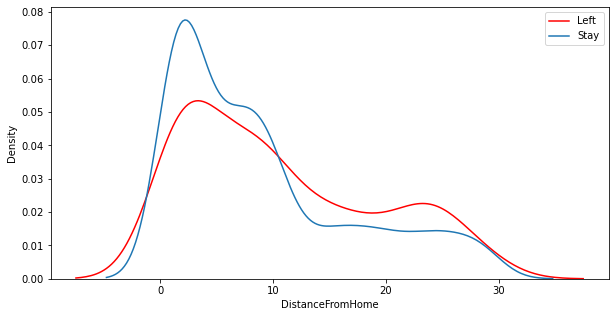

In [23]:
plt.figure(figsize=(10,5))
sns.kdeplot(left.DistanceFromHome, label='Left',color='r')
sns.kdeplot(stayed.DistanceFromHome, label='Stay')
plt.legend()

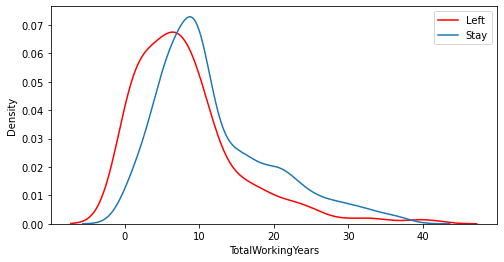

In [24]:
plt.figure(figsize=(8,4))
sns.kdeplot(left.TotalWorkingYears, label='Left', color='r')
sns.kdeplot(stayed.TotalWorkingYears, label='Stay')
plt.legend()
plt.show()

**Minimum and maximum values from the Columns**

In [25]:
l = []
for column in data.columns:
    if data[column].dtypes != object and data[column].nunique() > 30:
        print(f"{column} : Minimum: {data[column].min()}, Maximum: {data[column].max()}")
        l.append(column)
        print("------------------------------------------------")

Age : Minimum: 18, Maximum: 60
------------------------------------------------
DailyRate : Minimum: 102, Maximum: 1499
------------------------------------------------
HourlyRate : Minimum: 30, Maximum: 100
------------------------------------------------
MonthlyIncome : Minimum: 1009, Maximum: 19999
------------------------------------------------
MonthlyRate : Minimum: 2094, Maximum: 26999
------------------------------------------------
TotalWorkingYears : Minimum: 0, Maximum: 40
------------------------------------------------
YearsAtCompany : Minimum: 0, Maximum: 40
------------------------------------------------


**Numeric Columns**

**Finding out the outliers**

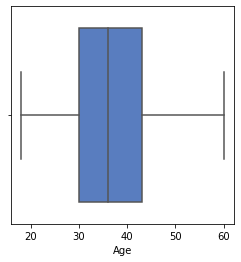

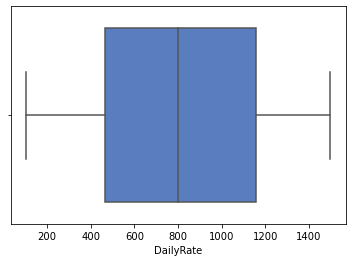

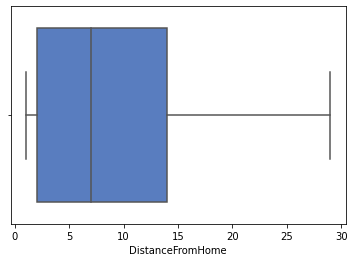

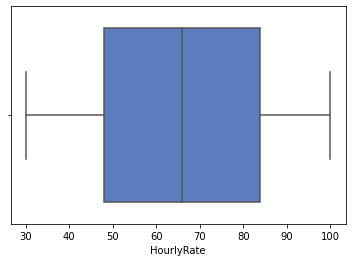

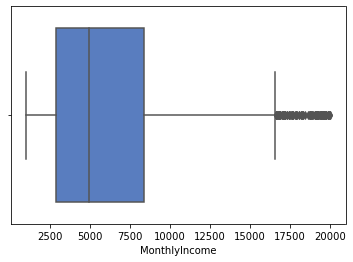

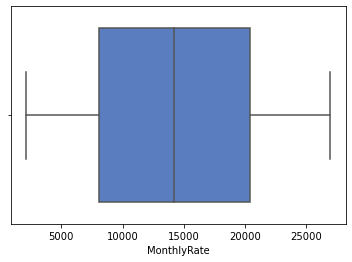

In [26]:
lst = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate']
fig= plt.figure(figsize=(4,4))
for i in lst:
    sns.boxplot(data[i],palette='muted')
    plt.show()

### Result from above Analysis

- There are Outliers in the "MonthlyIncome" Column

### Attrition by Education Level

In [27]:
fig=px.histogram(data , x='Education',color='Attrition')
fig.show()

### Result from Above Analysis

- Mostly Graduate employees seem to be leaving the company

### Attrition by Job Involvement

In [28]:
fig=px.histogram(data , x='JobInvolvement',color='Attrition')
fig.show()

### Result from above Analysis

- Employees with High Job Involvement tend to leave the company, while there is less attrition between Low and very high level job involvement.

### Attrition By Job Level

In [29]:
fig=px.histogram(data , x='JobLevel',color='Attrition')
fig.show()

### Result from above Analysis

- Mostly Employees between junior and associate level tend to leave the company more than compared to others.

### Attrition by Salary Hike

In [30]:
fig=px.histogram(data , x='PercentSalaryHike',color='Attrition')
fig.show()

### Result from above Analysis

- Employees who receive hikes between 12-14% tend to leave the company more than others with higher Salary hike percentage.

### Attrition By Age

In [31]:
fig=px.histogram(data , x='Age',color='Attrition')
fig.show()

### Result from above Analysis

- Majority of the employees who leave the company are less than 40yrs of age.

### Attrition by Specific Job Role

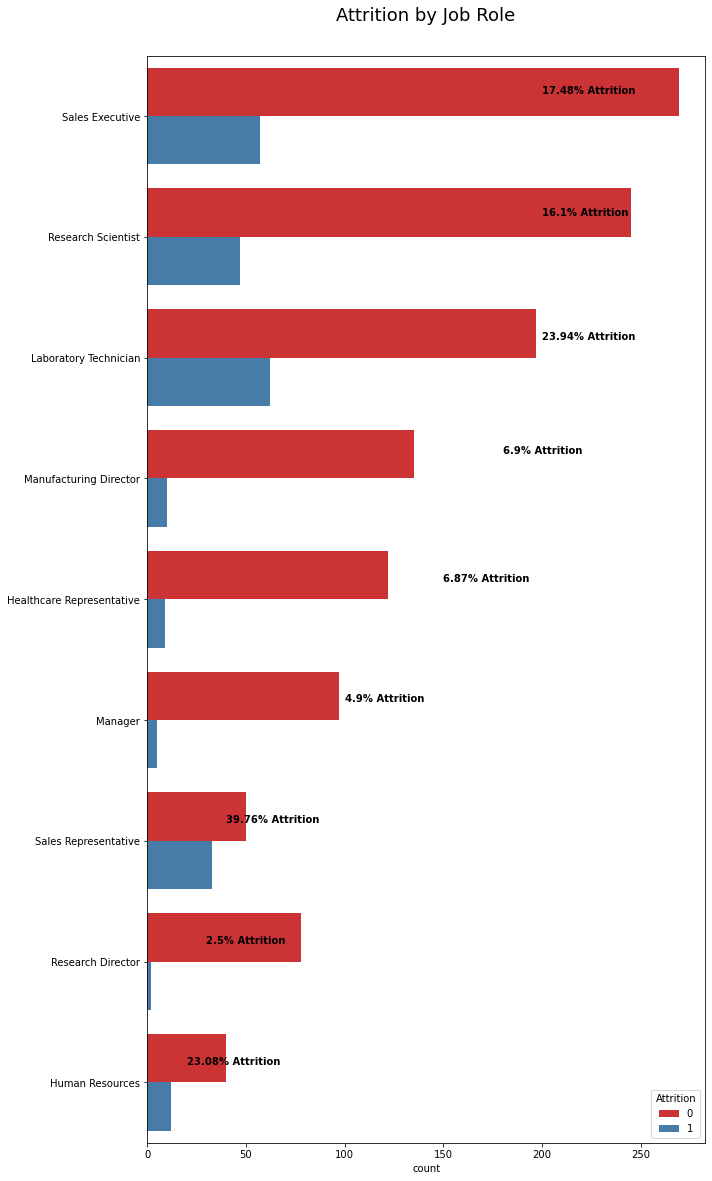

In [32]:
def percent_attrition(column, label):
    column_df = data.loc[data[column] == label]
    index  = column_df.index
    att_df = column_df.loc[column_df.Attrition == 1]
    att_index = att_df.index
    return (len(att_index) / len(index)) * 100
fig, ax = plt.subplots(1,1, figsize = (10, 20))

sns.countplot(data = data,
            y = "JobRole",
            hue = "Attrition",
            palette = "Set1")
ax.set_title("Attrition by Job Role", pad = 35, fontsize = 18)
ax.set_ylabel(None)

def plot_per(column, label, x, y):
    string = np.str(np.round(percent_attrition(column, label),2)) + "% Attrition"
    plt.text(x = x, y = y, s = string, fontweight = "semibold")
    
plot_per("JobRole", "Sales Executive", 200, -0.19)
plot_per("JobRole", "Research Scientist", 200, .82)
plot_per("JobRole", "Laboratory Technician", 200, 1.85)
plot_per("JobRole", "Manufacturing Director", 180, 2.79)
plot_per("JobRole", "Healthcare Representative", 150, 3.85)
plot_per("JobRole", "Manager", 100, 4.85)
plot_per("JobRole", "Sales Representative", 40, 5.85)
plot_per("JobRole", "Research Director", 30, 6.85)
plot_per("JobRole", "Human Resources", 20, 7.85)

### Result from above Analysis

- Sales Representative has the heighest Attrition Rate.

### JobRole VS MonthlyIncome

<AxesSubplot:xlabel='JobRole', ylabel='MonthlyIncome'>

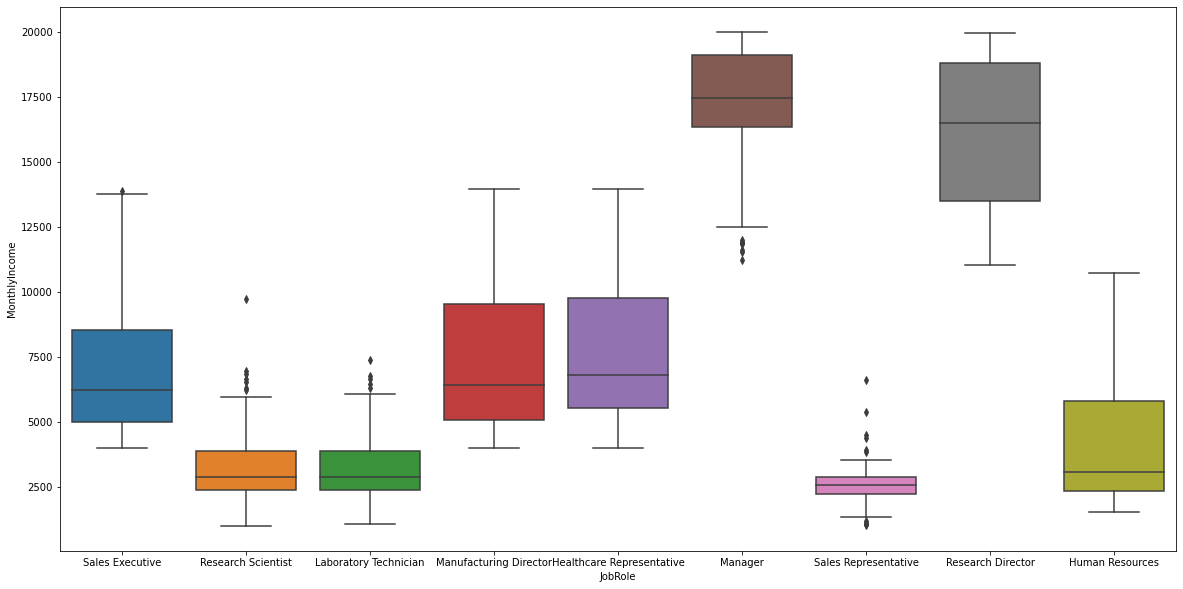

In [33]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x='JobRole', y='MonthlyIncome')

### Result from above Analysis

- As there is less salary to Sales Representative, the attrition for this job role is at higher side.

## Data Pre-Processing

### Converting all Categorical Variables to Numerical (Dummy) Variables

In [34]:
dummies = pd.get_dummies(df_cat)
dummies.head(3)

BusinessTravel_Non-Travel  BusinessTravel_Travel_Frequently  \
0                          0                                 0   
1                          0                                 1   
2                          0                                 0   

   BusinessTravel_Travel_Rarely  Department_Human Resources  \
0                             1                           0   
1                             0                           0   
2                             1                           0   

   Department_Research & Development  Department_Sales  Education_Doctorate  \
0                                  0                 1                    0   
1                                  1                 0                    0   
2                                  1                 0                    0   

   Education_Graduate  Education_High School  Education_Post Graduate  ...  \
0                   0                      0                        0  ...   
1                   0                      1                        0  ...   
2                   0                      0                        0  ...   

   JobSatisfaction_Low  JobSatisfaction_Medium  JobSatisfaction_Very High  \
0                    0                       0                          1   
1                    0                       1                          0   
2                    0                       0                          0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       0                      1                     0   
2                       0                      0                     1   

   OverTime_No  OverTime_Yes  PerformanceRating_High  \
0            0             1                       1   
1            1             0                       0   
2            0             1                       1   

   PerformanceRating_Very High  
0                            0  
1                            1  
2                            0  

[3 rows x 43 columns]

In [35]:
dummy_df =data
dummy_df

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome      Education EducationField  EnvironmentSatisfaction  \
0                    1      Undergrad  Life Sciences                        2   
1                    8    High School  Life Sciences                        3   
2                    2      Undergrad          Other                        4   
3                    3  Post Graduate  Life Sciences                        4   
4                    2    High School        Medical                        1   
...                ...            ...            ...                      ...   
1465                23      Undergrad        Medical                        3   
1466                 6    High School        Medical                        4   
1467                 4       Graduate  Life Sciences                        2   
1468                 2       Graduate        Medical                        4   
1469                 8       Graduate        Medical                        2   

      Gender  ...  PerformanceRating RelationshipSatisfaction  \
0     Female  ...               High                        1   
1       Male  ...          Very High                        4   
2       Male  ...               High                        2   
3     Female  ...               High                        3   
4       Male  ...               High                        4   
...      ...  ...                ...                      ...   
1465    Male  ...               High                        3   
1466    Male  ...               High                        1   
1467    Male  ...          Very High                        2   
1468    Male  ...               High                        4   
1469    Male  ...               High                        1   

      StockOptionLevel TotalWorkingYears TrainingTimesLastYear  \
0                    0                 8                     0   
1                    1                10                     3   
2                    0                 7                     3   
3                    0                 8                     3   
4                    1                 6                     3   
...                ...               ...                   ...   
1465                 1                17                     3   
1466                 1                 9                     5   
1467                 1                 6                     0   
1468                 0                17                     3   
1469                 0                 6                     3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7      

## Feature Scaling

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(dummies)
x_normalized

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

## Modelling Part

### 1) Decission Tree Classifier

### Importing the Ncessary Libraries

In [37]:
!pip install imbalanced-learn
!pip install scikit-learn==1.1.2

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

### Split the data into Target & Features

In [39]:
x = x_normalized
y = data['Attrition'].values

x

array([[0., 0., 1., ..., 1., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

**Our target variable class is imbalanced, so we will use SMOTE to over sample the minority class for balancing**

In [40]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

### Spliting the data into Train & Test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42, stratify=y_sm)

**Fitting Data into Model & Checking the Training & Testing Accuracy of the Model.**

In [42]:
model_dt = DecisionTreeClassifier(max_depth=8, random_state=1,criterion ='gini')
model_dt.fit(x_train,y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.9046653144016227
Testing score:  0.8319838056680162


**Prediction Probability of Model**

In [43]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]

**Performance Metrics**

In [44]:
y_pred1 = model_dt.predict(x_test)

In [45]:
acc_dt = accuracy_score(y_test,y_pred1)
acc_dt

0.8319838056680162

**Testing set Performace**

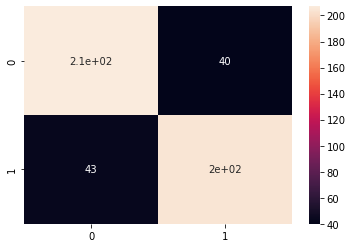

In [46]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True)
plt.show()

**Classification Report**

In [47]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       247
           1       0.84      0.83      0.83       247

    accuracy                           0.83       494
   macro avg       0.83      0.83      0.83       494
weighted avg       0.83      0.83      0.83       494



**Receiver Operating Characteristic ( ROC ) Curve**

In [48]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

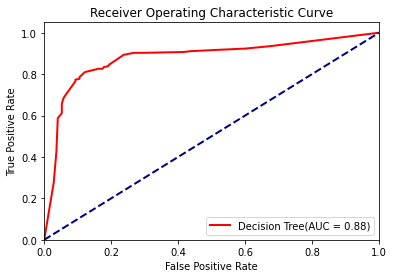

In [49]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='red',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

**The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.**

- To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the curve.
- After calculating the AUC, Decision Tree Classifier model have 0.90% of the plot located under the curve.
- The closer AUC is to 1, the better the model.

### 2) Random Forest Classifier

**Importing Library and Fitting Data into Model & Predicting on Test Data**

In [50]:
from sklearn.ensemble import RandomForestClassifier
fit_rf = RandomForestClassifier(random_state=1)
fit_rf.fit(x_train, y_train)
y_pred_rf = fit_rf.predict(x_test)

**Testing Set Performance**

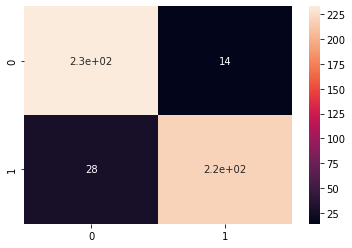

In [51]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True )
plt.show()

**Prediction Probability of Model**

In [52]:
y_prob_rf = fit_rf.predict_proba(x_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf[:,1])

**Classification Report**

In [53]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       247
           1       0.94      0.89      0.91       247

    accuracy                           0.91       494
   macro avg       0.92      0.91      0.91       494
weighted avg       0.92      0.91      0.91       494



**Confusion Matrix**

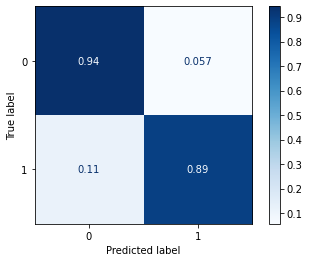

In [54]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(fit_rf, x_test, y_test, normalize="true", cmap="Blues")

**Checking Accuracy of Model**

In [55]:
accuracy_rf = accuracy_score(y_test ,y_pred_rf)
accuracy_rf

0.9149797570850202

**Receiver Operating Characteristics ( ROC ) Curve**

In [56]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

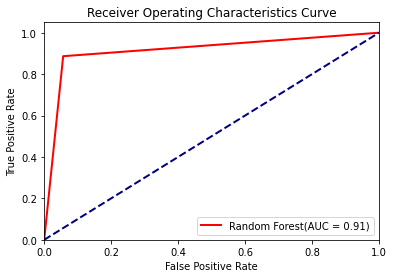

In [57]:
plt.figure(1)
lw = 2
plt.plot(fpr_rf, tpr_rf, color='red',
         lw=lw, label='Random Forest(AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc="lower right")
plt.show()

**The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.**

- To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the curve.
- After calculating the AUC, Random Forest Classifier model have 0.92% of the plot located under the curve.
- The closer AUC is to 1, the better the model.

## 3) Logistic Regression

**Importing Library & Fitting Data into Model & Predicting on Test Data**

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

**Confusion Matrix**

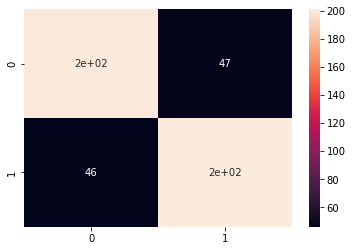

In [59]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True )
plt.show()

**Checking Accuracy of Model**

In [60]:
accuracy_logreg = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_logreg)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8117408906882592
Precision: 0.8104838709677419
Recall: 0.8137651821862348


**Prediction Probability of Model**

In [61]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]

**Classification Report**

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       247
           1       0.81      0.81      0.81       247

    accuracy                           0.81       494
   macro avg       0.81      0.81      0.81       494
weighted avg       0.81      0.81      0.81       494



**Receiver Operating Characteristics ( ROC ) Curve**

In [63]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

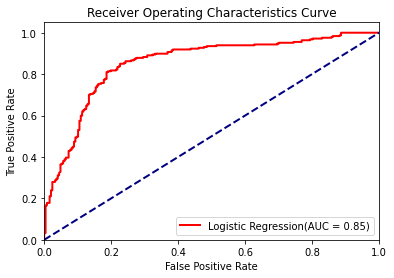

In [64]:
plt.figure(1)
lw = 2
plt.plot(fpr,tpr,color='red',
         lw=lw,label="Logistic Regression(AUC = %0.2f)" % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics Curve')
plt.legend(loc="lower right")
plt.show()

**The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data into categories.**

- To quantify this, we can calculate the AUC (area under the curve) which tells us how much of the plot is located under the curve.
- After calculating the AUC, Logistic Regression model have 0.86% of the plot located under the curve.
- The closer AUC is to 1, the better the model.

## Model Evaluation Based on Accuracy

In [65]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [accuracy_logreg,acc_dt,accuracy_rf]
    
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
2  Random Forest Classifier  0.914980
1  Decision Tree Classifier  0.831984
0       Logistic Regression  0.811741

## Final Model

**"Random Forest Classifier" Model has the Highest Accuracy Score & AUC, which indicates that it has the Highest Accuracy & Area Under the Curve and is the Best Model at Correctly Classifying Observations into Categories among these Models.**

                                             **----XXXXXX----**